# Post-hoc Single Data analysis
事后分析，单文件可视化

In [1]:
import sys
sys.path.append(r"D:\data analysis\code\WBI_analysis")  # 例如 r"C:\Users\YourName\Project"
import AnalysisMethod as am
import pandas as pd
import os
import numpy as np
import WBIFunctions as WBI
from datetime import datetime
import cv2
from sklearn.cluster import AgglomerativeClustering

单个数据可视化

In [13]:
p_f = r'Y:\\SZX\\2025_wbi_analysis\\good_WBI\\done\\'

file_name = '\\20241219_0g-ov_05'
print(file_name)
p_file_name = file_name+'_corr_p_cor.csv'
df_p_cor = pd.read_csv(p_f+file_name+'\\AnalysisFigs\\CorrAnalysis'+p_file_name)
# df_p_cor['EventNote'] = df_p_cor['EventNote'].fillna(df_p_cor['Event'])


\20241219_0g-ov_05


In [14]:
df_p_con = df_p_cor[df_p_cor['EventNote'].isna()]

In [16]:
df_p_cor

,Neuron,Event,EventNote,test_used,p_val,p_cor,true_r,sign,File
0,neuron1,forward,RevStart,Wilcoxon,0.015625,0.064174,NaN,NaN,20241219_0g-ov_05
1,neuron2,forward,RevStart,paired t,0.013154,0.064174,NaN,NaN,20241219_0g-ov_05
2,neuron3,forward,RevStart,paired t,0.000154,0.008836,NaN,NaN,20241219_0g-ov_05
3,neuron4,forward,RevStart,paired t,0.005093,0.039047,NaN,NaN,20241219_0g-ov_05
4,neuron5,forward,RevStart,paired t,0.034789,0.092292,NaN,NaN,20241219_0g-ov_05
...,...,...,...,...,...,...,...,...,...
1375,neuron111,sm_CTX,NaN,NaN,0.312400,0.860767,0.090301,0.0,20241219_0g-ov_05
1376,neuron112,sm_CTX,NaN,NaN,0.056000,0.749800,0.188533,0.0,20241219_0g-ov_05
1377,neuron113,sm_CTX,NaN,NaN,0.370000,0.860767,0.085977,0.0,20241219_0g-ov_05
1378,neuron114,sm_CTX,NaN,NaN,0.802000,1.000000,-0.031840,0.0,20241219_0g-ov_05


In [15]:

num_n =len(df_p_con['Neuron'].unique())
s_title = file_name+'_Corr_Heatmap.png'
WBI.plot_correlation_heatmap_nomask_from_df(df=df_p_con, 
                        row_col = 'Event',
                        col_col = 'Neuron',
                        r_col = 'true_r',
                        p_col = 'p_cor',
                        colormap = "coolwarm",
                        alpha_original=0.05,
                        title=file_name+"Neu-Beh_Corr_Heatmap",
                        x_ticklabels = np.arange(1,num_n+1,1),
                        r_threshold = 0.20,
                        mask_color = '#f0f0f0',
                        save_path=p_f,
                        save_title=s_title,
                    fs = 12)

图片已保存到: Y:\\SZX\\2025_wbi_analysis\\good_WBI\\done\\


整合单个或多个数据的分析结果可视化

In [ ]:
p_f = r'Y:\\SZX\\2025_wbi_analysis\\good_WBI\\done\\'
file_ls = [f for f in os.listdir(p_f) if os.path.isdir(os.path.join(p_f, f))]
# file_name = '\\20250116_4.5g-ov_05'
for file_name in file_ls:
    print(file_name)
    p_file_name = '\\'+file_name+'_corr_p_cor.csv'
    df_p_cor = pd.read_csv(p_f+file_name+'\\AnalysisFigs\\CorrAnalysis'+p_file_name)
    df_p_cor['EventNote'] = df_p_cor['EventNote'].fillna(df_p_cor['Event'])
    num_n =len(df_p_cor['Neuron'].unique())
    s_title = file_name+'_Corr_Heatmap.png'
    WBI.plot_correlation_heatmap_nomask_from_df(df=df_p_cor, 
                            row_col = 'EventNote',
                            col_col = 'Neuron',
                            r_col = 'true_r',
                            p_col = 'p_cor',
                            colormap = "coolwarm",
                            alpha_original=0.05,
                            title=file_name+"Neu-Beh_Corr_Heatmap",
                            x_ticklabels = np.arange(1,num_n+1,1),
                            r_threshold = 0.20,
                            mask_color = '#f0f0f0',
                            save_path=p_f,
                            save_title=s_title,
                        fs = 12)

### 单数据重绘图

挑选部分相关神经元画trace

In [ ]:
p_f = r'Y:\\SZX\\2025_wbi_analysis\\good_WBI\\done\\20241219_0g-ov_05'
path = p_f + r'\\AnalysisFigs\\CorrAnalysis'
df_file = '20241219_0g-ov_05_corr_p_cor.csv'
# 导入显著检验方程
df_p_cor = pd.read_csv(path+'\\'+df_file)


#### 预处理

In [4]:
# (与荧光对时的)行为数据导入，不需要重新分析处理的
'''激光段的行为数据,帧率为30Hz左右'''
mot_mid_pkl = [f for f in os.listdir(p_f) if 'MotionMidlineMatchVol.pkl' in f]
mot_mid_csv = [f for f in os.listdir(p_f) if 'MotionMidlineMatchVol.csv' in f]
if len(mot_mid_pkl):
    print('read pickle')
    df_mot_vol = pd.read_pickle(os.path.join(p_f, mot_mid_pkl[0])).reset_index(drop=True)
elif len(mot_mid_csv):
    df_mot_vol = pd.read_csv(os.path.join(p_f, mot_mid_csv[0]))
else:
    print('No df_mot_midline')
# 钙信号导入
calcium_intensity= np.load(os.path.join(p_f, 'calcium_intensity.npy'))
# 根据mask列作预处理

mask = df_mot_vol['mask'].values.astype(bool)   # True 表示要置 NaN
calcium_intensity[:, mask] = np.nan


# save_p = p_f.split('calcium_intensity.npy')[0]
print('文件大小:neuron*timestamp',calcium_intensity.shape)
# 平滑calcium signal： 均值滤波器 (box filter),处理nan值
# scale = 1.5
# for i in range(calcium_intensity.shape[0]):
#     calcium_intensity[i] = (cv2.blur(calcium_intensity[i], (1, 7))*scale)[:,0]
scale = 1.5
for i in range(calcium_intensity.shape[0]):
    row = calcium_intensity[i]
    mean_val = np.nanmean(row)
    row_no_nan = np.where(np.isnan(row), mean_val, row)
    smoothed = cv2.blur(row_no_nan.reshape(-1, 1), (7, 1)) * scale
    calcium_intensity[i] = smoothed[:, 0]
calcium_intensity[:, mask] = np.nan
# 求前进速度和速率
df_mot_vol["head_velocity"] = df_mot_vol.apply(WBI.signed_norm, axis=1)
df_mot_vol["head_speed"] = df_mot_vol["head_velocity"].abs()
# 连续运动变量平滑
window_size = 15
# 计算移动平均值
df_mot_vol['sm_velocity'] = df_mot_vol['head_velocity'].rolling(window=window_size, min_periods=1).mean()
df_mot_vol['sm_speed'] = df_mot_vol['head_speed'].rolling(window=window_size, min_periods=1).mean()
# # 平滑ctx
window_size = 15
# 计算移动平均值
df_mot_vol['sm_CTX'] = df_mot_vol['CTX_left'].rolling(window=window_size, min_periods=1).mean()
df_mot_vol['sm_ang'] = df_mot_vol['ang_velocity'].rolling(window=window_size, min_periods=1).mean()

# 定义图片保存文件夹路径
now = datetime.now()
hour_str = now.strftime("%Y-%m-%d-%H")
folder_path = os.path.join(p_f, hour_str+'_AnalysisFigs')
# 检查文件夹是否存在
if not os.path.exists(folder_path):
    os.makedirs(folder_path)  # 创建文件夹
    print(f"文件夹 '{folder_path}' 已创建！")
else:
    print(f"文件夹 '{folder_path}' 已存在！")
signal_save_path = folder_path+'\\HierClustering'
os.makedirs(signal_save_path, exist_ok=True)
choose_index = 0
thresh = 5
links=['ward','average','average','complete']
affs=['euclidean','cosine','cityblock','cosine']
vmin=-0.5
vmax=1
smooth_kernel = 10
print('calcium_intensity.shape',calcium_intensity.shape)

valid_timepoints = ~mask
calcium_valid = calcium_intensity[:, valid_timepoints]
# 使用 np.corrcoef(calcium_intensity) 计算神经元钙信号的相关性矩阵
# 聚类：使用 am.cluster 和指定的链接方式 (link=links[choose_index]) 
# 和距离度量 (aff=affs[choose_index]) 对相关性矩阵进行聚类。
idx=am.cluster(np.corrcoef(calcium_valid),link=links[choose_index],aff=affs[choose_index])
# idx为聚类之后的索引
bound=np.cumsum(am.GetBound(np.corrcoef(calcium_valid),link=links[choose_index],aff=affs[choose_index],
                            threshold=thresh).astype(int))
# 调用 am.GetBound 计算矩阵分区的边界（bound），通过 np.cumsum 累积求和获取完整的边界数组
print('边界', bound)

calcium_valid = calcium_valid[idx]
calcium_intensity = calcium_intensity[idx]
# calcium_intensity_smd = calcium_intensity.copy()
# 平滑数据
if smooth_kernel:
    for i,k in enumerate(calcium_valid):
        calcium_valid[i] = cv2.blur(k,(1,smooth_kernel))[:,0]
# 计算相关性矩阵
w_p2m = np.corrcoef(calcium_valid)

# 聚类并将聚类的结果画在相关性矩阵旁边
link = links[choose_index]
aff = affs[choose_index]
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage=link, affinity=aff)
model = model.fit(w_p2m)
font_size = 100

'''输入事件开始index列表'''
neuron_ids = np.arange(calcium_valid.shape[0])
col_draw = ['sm_velocity','sm_speed', 'sm_ang', 'sm_CTX','curvature', 'forward','turn_pc','turn_cor']
# df_mot_valid = df_mot_vol[df_mot_vol['mask']==0]
WBI.calcium_heatmap(calcium_intensity,df_mot_vol, col_draw,  neuron_ids,model,w_p2m, show_id_stride=10,
                show_vol_stride=500, heatmap_range=(0,0.6),wspace=0.06, hspace=0.2,bound_cluster=bound,
                unit_w=0.03, unit_h = 0.8, cal_height_ratio=30, smooth_kernel=smooth_kernel,
                font_size=font_size, font_color='black', idx = idx, vmin = vmin, vmax = vmax,
                    threshold=thresh, xlabel='Neuron Index',level=35, signal_save_path=signal_save_path)
'''注意这里是通过上一步排序后的钙信号数据！'''

calcium_intensity_sort = calcium_intensity.copy()
block_path = signal_save_path+'\\BlockHighlight'
os.makedirs(block_path, exist_ok=True)
calcium_dict = {i: calcium_intensity_sort[i] for i in range(len(calcium_intensity_sort))}
WBI.block_visualize_traces(block_path,calcium_intensity_sort, calcium_dict,df_mot_vol, bound, smooth=True, sigma=0.3,delta_y=1.2)
calcium_intensity_sort_T = calcium_intensity_sort.T


# 创建列名
col_neuron_names = [f"neuron{i+1}" for i in range(calcium_intensity_sort_T.shape[1])]
df_calcium = pd.DataFrame(calcium_intensity_sort_T, columns=col_neuron_names)
# 按照行索引合并
df_cal_motion_org = pd.concat([df_calcium, df_mot_vol], axis=1)
# 将masl=1的部分去掉
# df_cal_motion.loc[df_cal_motion['mask']==1,:]=np.nan
df_cal_motion = df_cal_motion_org.loc[df_cal_motion_org['mask']==0,:]

文件大小:neuron*timestamp (155, 2835)
文件夹 'Y:\\SZX\\2025_wbi_analysis\\good_WBI\\done\\20250609_lg9624-1g-00225-23.5d-ov_008\2025-09-24-11_AnalysisFigs' 已存在！
calcium_intensity.shape (155, 2835)
边界 [ 15  43  72 103 119 155]
shape of calcium_traces (155, 2835)
分组是否和神经元数量相同： True


#### 相关性检验：Speed

总的时间范围：[25.140197103496995, 875.359]


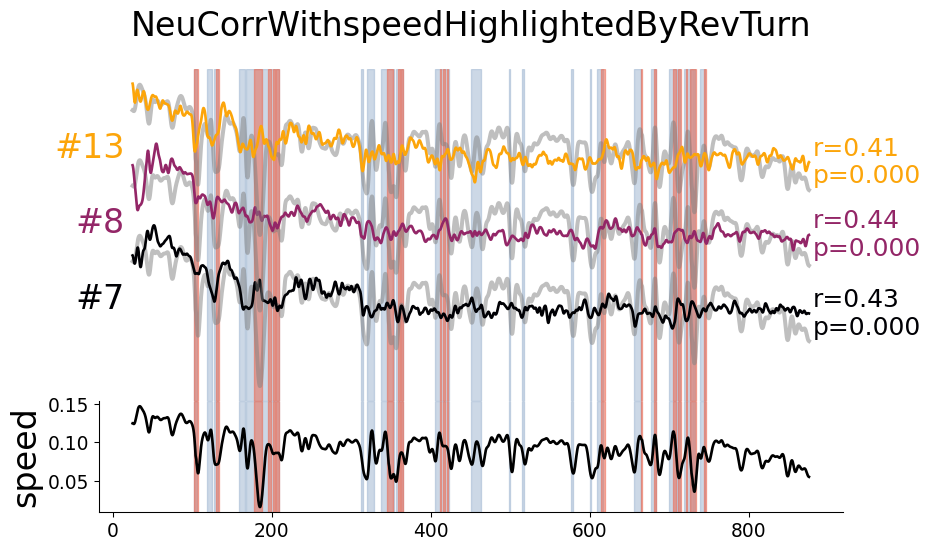

In [7]:
df_p_cor['sign'] = 0
df_p_cor.loc[(df_p_cor['p_cor']<=0.05)&(df_p_cor['true_r'].abs()>0.41),'sign'] = 1

# 显著的神经元
sign_neu_ls = df_p_cor[(df_p_cor['sign']==1)&((df_p_cor['Event']=='sm_speed'))]['Neuron'].unique()
# 首先作折线图
WBI.plot_lines_neural_activity(df_cal_motion, sign_neu_ls,df_p_cor,
                            'sm_speed',hl_col = ["forward",'turn_pc'],hl_color=["#9AB3CF","#ED6148"], num_bins=5,
                                title=f"NeuCorrWith{'sm_speed'.replace('sm_','')}HighlightedByRevTurn", color_map='inferno',
                            fs=25, x_bin=0.2, time_range_sel=[],axis_invisible = True,
                            color='#2878B5', x_label='', y_label='',sigma = 5,
                            strip_color='#9AC9DB', label_pr=True, p_f=None)

#### 相关性检验：turn_pc

850.218802896503
总的时间范围：[25.140197103496995, 875.359]


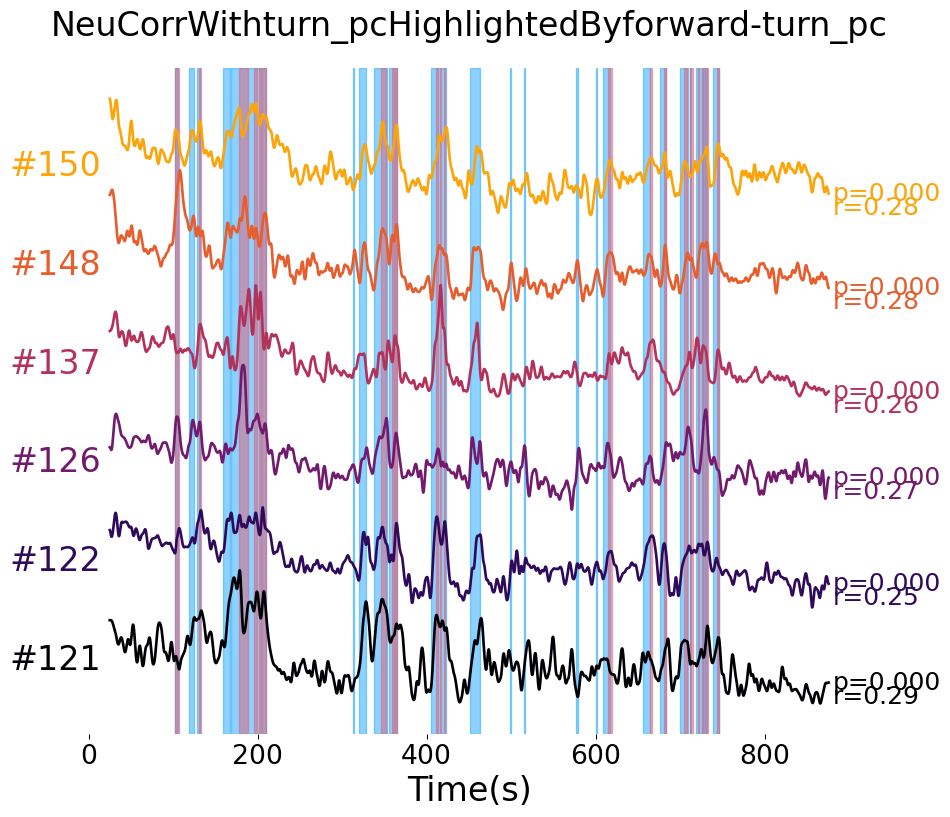

(事次*timestamp)(8, 20)
160


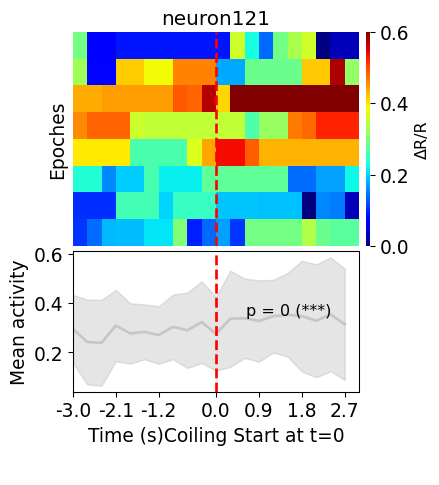

160


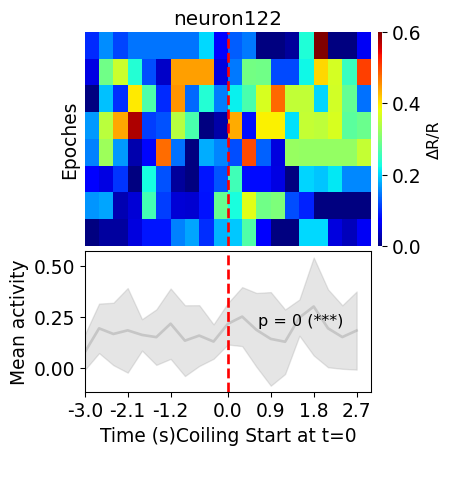

160


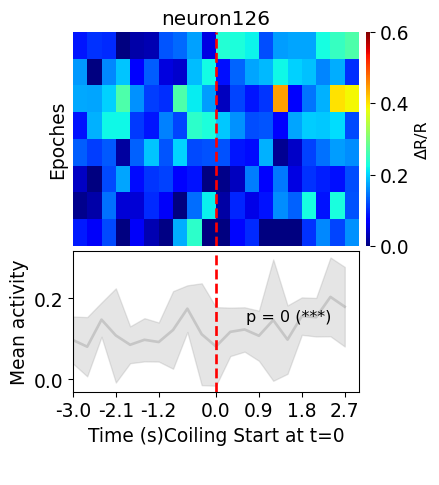

160


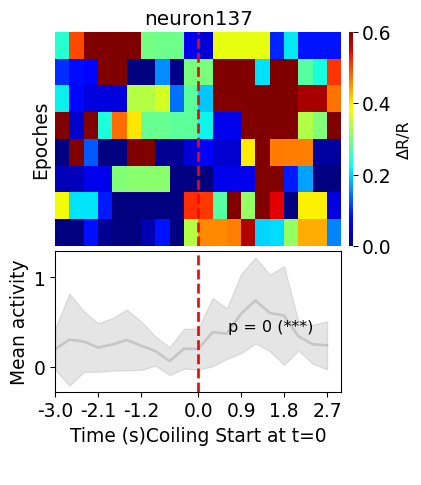

160


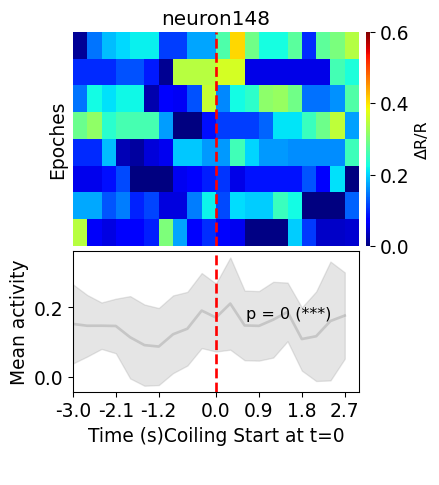

160


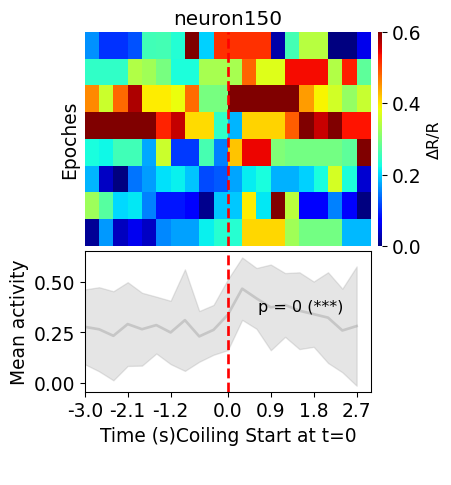

In [19]:
beh_col = 'turn_pc'
p_uplim = 0.05
r_threshold = 0.25
c_start_idx = WBI.get_event_start_idx(df_cal_motion, 'turn_pc', 'start')
df_neu_coil_p = WBI.corr_neu_con_var(df_cal_motion,behavior_col_ls=[beh_col],
                    neuron_col_str='neuron',adj_method = 'fdr_bh' )
df_neu_coil_p['sign'] = 0
df_neu_coil_p.loc[(df_neu_coil_p['p_cor']<=p_uplim)&(df_neu_coil_p['true_r'].abs()>r_threshold),'sign'] = 1
# 显著的神经元
sign_neu_ls = df_neu_coil_p[(df_neu_coil_p['sign']==1)&((df_neu_coil_p['Event']==beh_col))]['Neuron'].unique()
hl_col_ls = ['forward',"turn_pc"]


if len(sign_neu_ls)>0:
    WBI.plot_lines_neural_activity_disc(df_cal_motion, sign_neu_ls,df_neu_coil_p,beh_col,
                            hl_col =hl_col_ls,hl_color=[ "#1BA4FF","#DF6176",], num_bins=5,
                                title=f"NeuCorrWith{beh_col.replace('sm_','')}HighlightedBy{'-'.join(hl_col_ls)}", color_map='inferno',
                            fs=25, x_bin=0.2, time_range_sel=[],axis_invisible = True,
                            color='#2878B5', x_label='', y_label='',sigma = 5,
                            strip_color='#9AC9DB', p_f=None)
    WBI.plot_event_aligned_traces_combined(df_cal_motion,'turn_pc',df_neu_coil_p, sign_neu_ls, c_start_idx,
                                        pre_window = 10,post_window=10, 
                                            sort_by='pre',sort_window=10,  frame_interval=0.3,
                                            heatmap_range = (0,0.6),save_title_str='CoilingStart',x_label_str='Coiling Start',
                                            cmap='jet', unify_yaxis=True, save_path=None)


850.218802896503
总的时间范围：[25.140197103496995, 875.359]


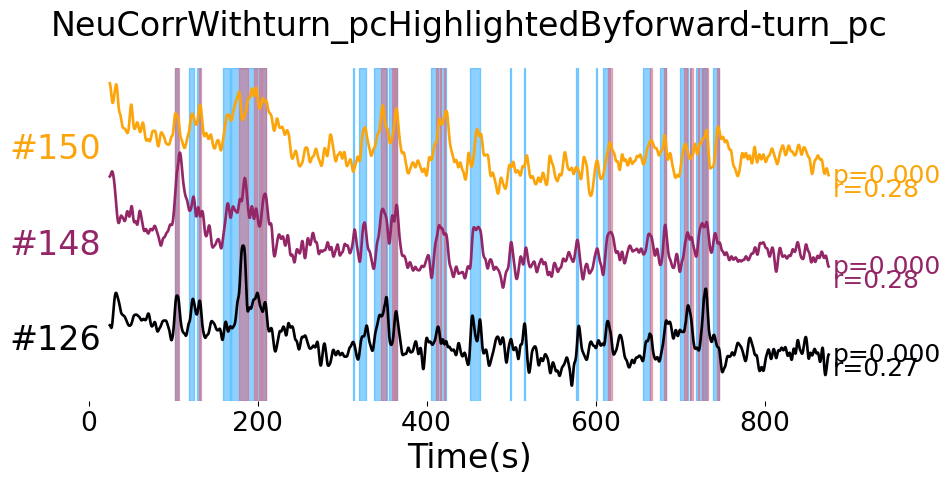

In [18]:
# 需要先跑上一步
WBI.plot_lines_neural_activity_disc(df_cal_motion, ["neuron126","neuron148","neuron150"],df_neu_coil_p,beh_col,
                            hl_col =hl_col_ls,hl_color=[ "#1BA4FF","#DF6176",], num_bins=5,
                                title=f"NeuCorrWith{beh_col.replace('sm_','')}HighlightedBy{'-'.join(hl_col_ls)}", color_map='inferno',
                            fs=25, x_bin=0.2, time_range_sel=[],axis_invisible = True,
                            color='#2878B5', x_label='', y_label='',sigma = 5,
                            strip_color='#9AC9DB', p_f=None)